Given the Wave Function
<div align="center">$\psi(x) = \begin{cases}
0 & x < 0 \\
Ce^{-x/L} & x \geq 0 
\end{cases}$ 
<br>
<br> 
<div align="left">with L = 1 nm, the constant C can be found through the normalization of the wave function. 
<br>
<br>
<div align="center">$\int_{-\infty}^{\infty} |\psi(x)|^2 dx = 1$
<br>
<br>
<div align="left"> Can be equivalently re-written as
<br>
<br>
<div align="center">$\int_{-\infty}^{0} |\psi(x)|^2 dx + \int_{0}^{\infty} |\psi(x)|^2 dx= 1$
<br> 
<br>
$\int_{-\infty}^{0} |0|^2 dx + \int_{0}^{\infty} |Ce^{-x/L}|^2 dx= 1$
<br>
<br>
<div align="left"> which is simply...
<br> 
<br>
<div align="center">$\int_{0}^{\infty} |Ce^{-x/L}|^2 dx= 1$
<br> 
<br> 
<div align="left"> Integrating and solving for C, find C = $\pm\sqrt{2}$.
<br>
<br>s}$s}$}$
s}$s \

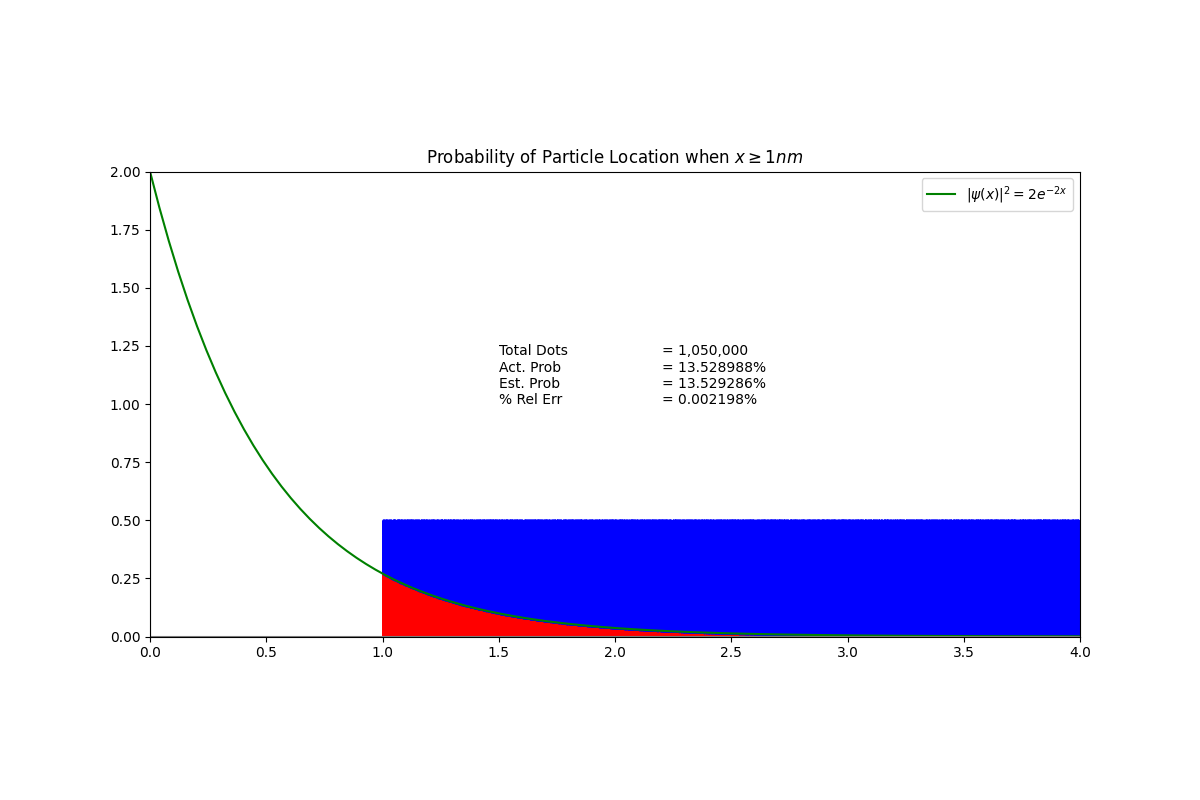

In [22]:
""" particle_location.ipynb """ 

# Cell 1

# Estimating the Probabilty of the Particle found within a region 
# using matplotlib and Monte Carlo

# Improting necessary modules and libraries
from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Rectangle
from numba import float64, vectorize  # type: ignore
from scipy.integrate import quad # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# Halton QRNG function obtained from David Biersach
@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def f(x: np.float_) -> NDArray[np.float_]:
    """ Defining the Wave function's probability distribution after solving for C and substituting L """
    return 2 * np.exp(-2 * x)

def plot_probability(ax: Axes) -> None: 
    """ This function will plot the Halton QRNG rectangle to estimate the probability 
    of the particle for x >= 1. Furthermore, the function will plot the pdf of the particle. """
    
    # This number of iterations produces a low % relative error
    iterations: int = 1_050_000

    # Rectangle function starting at (1,0) to estimate the probability for x >= 1 nm
    rectangle = Rectangle((1, 0), 5, 0.5)

    # Prime numbers are important for high-quality random numbers
    primes: list[int] = [2, 3]

    # Constraining x, y's sample space
    x: NDArray[np.float_] = rectangle.get_x() + \
        halton(np.arange(iterations), primes[0]) * rectangle.get_width()  # type: ignore
    y: NDArray[np.float_] = rectangle.get_y() + \
        halton(np.arange(iterations), primes[1]) * rectangle.get_height()  # type: ignore

    # Constraining Monte Carlo dots to be respectively above and under the PDF
    d: NDArray[np.float_] = f(x) - y
    x_in: NDArray[np.float_] = x[d >= 0.0]
    y_in: NDArray[np.float_] = y[d >= 0.0]
    x_out: NDArray[np.float_] = x[d < 0.0]
    y_out: NDArray[np.float_] = y[d < 0.0]

    # Plotting the Monte Carlo curve
    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    # Plotting the pdf curve
    act_x: NDArray[np.float_] = np.linspace(0, 4, 100)
    act_y: NDArray[np.float_] = f(act_x)
    ax.plot(
        act_x, act_y, color="green", label=r"$|\psi(x)|^2=2e^{-2x}$"
    )

    # Calculating the error from area of the rectangle and estimated area
    est_area: float = np.count_nonzero(d >= 0.0) / iterations \
        * rectangle.get_width() * rectangle.get_height()
    
    # integrated the function f(x) will produce the actual area under the curve
    act_area: float = quad(f, rectangle.get_x(), rectangle.get_width())[0] #type: ignore
    
    err: float = (est_area - act_area) / act_area #type: ignore

    # addiing text annotations to the plot that convey key information
    ax.text(1.5, 1, "Total Dots\nAct. Prob\nEst. Prob\n% Rel Err", ha="left")
    # fmt: off
    ax.text(2.2, 1,
        f"= {iterations:,}\n= {act_area:.6%}\n= {est_area:.6%}\n= {err:.6%}", ha="left")
    # fmt: on

    # Customizing the Plot
    ax.set_title(r"Probability of Particle Location when $x \geq 1 nm$")
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 2)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")
    ax.legend(loc="upper right")
    
def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    plot_probability(plt.axes())
    plt.show()

main()

In [24]:
# Cell 2

# Using SciPy Integrate to numerically estimate the probability in Cell 1

# area under the curve can be numerically estimated using quad
# [0] needed so that format string can be passed
area = quad(f, 1, 100)[0]

# Printing the result
print(f"Probability = {area:.6%}")



Probability = 13.533528%
